# Recurent Neural Network with Convolutions & Fully Connected

![image](CNN.PNG)

## 1. Import Libraries and Load data

In [1]:
# import library
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def show_img (img):
  img = img.reshape ((28,28))
  #(28,28) dibuat menjadi tupple dengan ukuran 28x28 sehingga dituliskan ((28,28))
  plt.imshow(img)

In [3]:
# download data mnist dari data tensor flow. 
# mnist adalah data tulisan tangan dari angka 0 sampai angka 9

(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
# reshape (60000, 28, 28, 1)
X_train = X_train.reshape (60000,28, 28, 1)
X_test = X_test.reshape (10000, 28, 28, 1)

# re-type menjadi float number, dan update menjadi (data/maximal value of data). nilai terbesar X adalah 255, maka kita akan bagi dengan 255. 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255 

In [5]:
#onehotencoding untuk nilai y nya. Karena nilai y adalah dari 0 sampai 9, maka kita akan membuat encoder sampai dengan 10 kolom 
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

## **2. Membuat Arsitektur Jaringan dan Model**

In [7]:
# membuat arsitektur jaringan dengan convolusi

model = tf.keras.Sequential()
#membuat convolution first filter (convolusi pertama)
model.add(tf.keras.layers.Conv2D(50, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))

#membuat convolution second filter (convolusi kedua)
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

#membuat output
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

#flatten
model.add(tf.keras.layers.Flatten())

#dense
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
# training dengan membuat batch, dengan jumlah batch 128 batchs, agar iterasi lebih cepat. 
# nanti akan diiterasi sehingga seluruh data akan di-train. 
H = model.fit(X_train, y_train,validation_split=0.33, epochs=10, batch_size=128)

Train on 40199 samples, validate on 19801 samples
Epoch 1/10
40199/40199 [==============================] - 180s 4ms/sample - loss: 0.1983 - accuracy: 0.9412 - val_loss: 0.0726 - val_accuracy: 0.9777
Epoch 2/10
40199/40199 [==============================] - 169s 4ms/sample - loss: 0.0534 - accuracy: 0.9832 - val_loss: 0.0592 - val_accuracy: 0.9815
Epoch 3/10
40199/40199 [==============================] - 178s 4ms/sample - loss: 0.0324 - accuracy: 0.9897 - val_loss: 0.0571 - val_accuracy: 0.9833
Epoch 4/10
40199/40199 [==============================] - 172s 4ms/sample - loss: 0.0196 - accuracy: 0.9935 - val_loss: 0.0543 - val_accuracy: 0.9850
Epoch 5/10
40199/40199 [==============================] - 178s 4ms/sample - loss: 0.0166 - accuracy: 0.9946 - val_loss: 0.0590 - val_accuracy: 0.9835
Epoch 6/10
40199/40199 [==============================] - 174s 4ms/sample - loss: 0.0110 - accuracy: 0.9965 - val_loss: 0.0583 - val_accuracy: 0.9856
Epoch 7/10
40199/40199 [==========================

## **3. Lihat Nilai Accuracy dan Loss Model**

In [11]:
# evaluate
loss, accuracy = model.evaluate (X_test, y_test, verbose = 0)
print ("Accuracy: {} %".format(accuracy*100))
print ("Loss: {}".format(loss))

Accuracy: 98.69999885559082 %
Loss: 0.05964280112103154


## 4. Lihat Prediksi dari Gambar

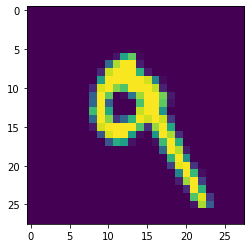

In [21]:
show_img(X_test[7])

In [22]:
scores = model.predict(X_test[7:8])
# [7:8] untuk memunculkan dalam bentuk np array bukan list
print(np.argmax(scores))
# print untuk memunculkan result
# argmax untuk memunculkan arg paling maximal

9


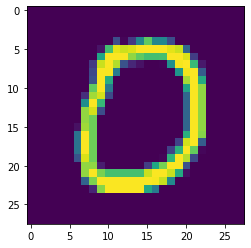

In [23]:
show_img(X_test[10])

In [24]:
scores = model.predict(X_test[10:11])
print(np.argmax(scores))

0


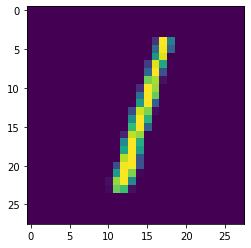

In [27]:
show_img(X_test[2])

In [28]:
scores = model.predict(X_test[2:3])
print(np.argmax(scores))

1
